# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Вопросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530203_70102.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0<=X<200,36.0,existing paid,-999.0,<1,male single,co applicant,1.0,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
497,no checking,24.0,critical/other existing credit,1585.0,4<=X<7,male single,none,3.0,life insurance,40.0,own,2.0,skilled,1.0,none,yes,good
498,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,guarantor,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
499,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,none,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good


## Пункт 1:

 - checking_status - номинальная !
 - durantion - абсолютная
 - credit_history - номинальная
 - credit_amount - абсолютная
 - employment - порядковая
 - personal_status - номинальная
 - other_parties - номинальная
 - residence_since - абсолютная
 - property_magnitude - номинальная
 - age - абсолютная
 - housing - номинальная
 - existing_credits - абсолютная
 - job - номинальная
 - num_dependents - абсолютная
 - own_telephone - номинальная
 - foreign_worker - номинальная
 - class - номинальная (целевая переменная)

## Пункт 2: Наименьшая дисперсия - num_dependents

In [4]:
credit_df.var().sort_values

<bound method Series.sort_values of duration            1.465e+02
credit_amount       8.061e+06
residence_since     1.351e+00
age                 1.315e+02
existing_credits    3.231e-01
num_dependents      1.233e-01
dtype: float64>

In [5]:
credit_df.var().min()

0.12330538922155689

## Пункт 3: Среднее какого признака отличается для двух классов сильнее всего? - в абсолютном значении - для credit_amount, в процентах - тоже credit_amount

In [6]:
mean=credit_df.pivot_table(credit_df.columns,['class'], aggfunc='mean')
mean

,age,credit_amount,duration,existing_credits,num_dependents,residence_since
class,,,,,,
bad,34.686,4104.292,25.255,1.380,1.153,2.730
good,35.821,2848.940,18.456,1.398,1.140,2.802


In [7]:
mean.diff().abs()

,age,credit_amount,duration,existing_credits,num_dependents,residence_since
class,,,,,,
bad,NaN,NaN,NaN,NaN,NaN,NaN
good,1.135,1255.352,6.799,0.019,0.013,0.072


In [8]:
mean.pct_change().abs()

,age,credit_amount,duration,existing_credits,num_dependents,residence_since
class,,,,,,
bad,NaN,NaN,NaN,NaN,NaN,NaN
good,0.033,0.306,0.269,0.014,0.011,0.026


## Пункт 4: В каком классе больше всего skilled работников? - в классе good

In [9]:
skill_workers=credit_df[credit_df.job=='skilled']             
skill_workers['class'].value_counts()

good    232
bad      80
Name: class, dtype: int64

## Пункт 5: Есть ли в наборе признаки с выбросами? Какие? existing_credits (возможно, потому что вряд-ли кому то одобрят 4 кредита сразу, хотя не это требует изучения), credit_amount(отрицательные значения ошибочны, возможно некоторые максимальные значения тоже)

<AxesSubplot:>

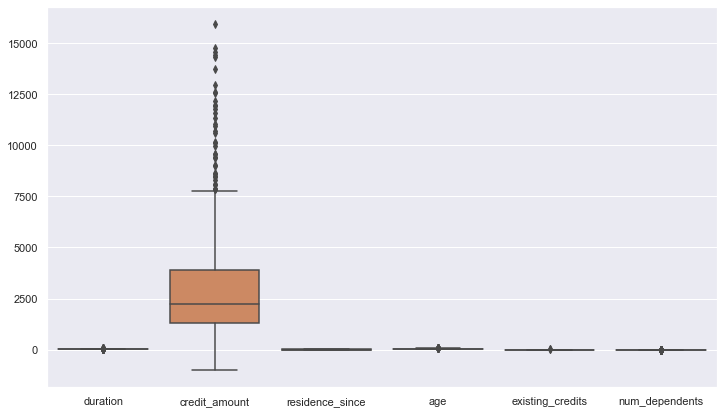

In [10]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

<AxesSubplot:>

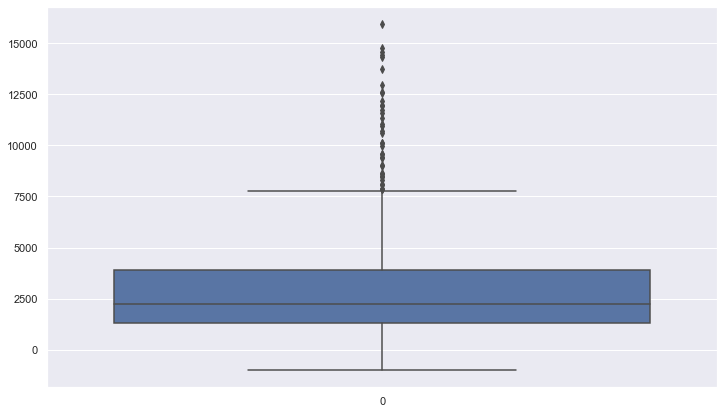

In [11]:
plt.subplots(figsize=(12,7))
#sns.boxplot(data=credit_df['duration']) 
#sns.boxplot(data=credit_df['residence_since'])
#sns.boxplot(data=credit_df['age'])
#sns.boxplot(data=credit_df['existing_credits'])
#sns.boxplot(data=credit_df['num_dependents'])
sns.boxplot(data=credit_df['credit_amount']) 

## Пункт 6: Сколько пропущенных значений в наборе? - 11

In [12]:
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
credit_amount         0
employment            0
personal_status       0
other_parties         0
residence_since       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

In [13]:
no_zero_columns = list (set(credit_df.columns))
(credit_df[no_zero_columns] == 0).sum()

own_telephone         0
checking_status       0
residence_since       0
duration              0
other_parties         0
credit_amount         0
personal_status       0
housing               0
foreign_worker        0
class                 0
existing_credits      0
num_dependents        0
job                   0
credit_history        0
employment            0
age                   0
property_magnitude    0
dtype: int64

In [14]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.00,501.000,501.000,501.000,501.000
mean,20.315,3192.22,2.782,35.511,1.393,1.144
std,12.103,2839.16,1.162,11.466,0.568,0.351
min,4.000,-999.00,-1.000,19.000,1.000,1.000
25%,12.000,1318.00,2.000,27.000,1.000,1.000
50%,18.000,2241.00,3.000,33.000,1.000,1.000
75%,24.000,3915.00,4.000,41.000,2.000,1.000
max,60.000,15945.00,4.000,75.000,4.000,2.000


In [15]:
credit_df[credit_df.credit_amount<=100] #Кредит не может быть меньше нуля

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
238,no checking,12.0,critical/other existing credit,-999.0,1<=X<4,female div/dep/mar,none,2.0,life insurance,35.0,own,2.0,skilled,1.0,none,yes,good
277,<0,12.0,existing paid,-999.0,>=7,male div/sep,none,4.0,life insurance,49.0,own,1.0,unskilled resident,1.0,yes,yes,good
307,<0,12.0,existing paid,-999.0,<1,male mar/wid,none,3.0,no known property,33.0,own,1.0,unskilled resident,1.0,yes,yes,bad
355,0<=X<200,24.0,existing paid,-999.0,<1,male single,none,2.0,real estate,23.0,own,1.0,unskilled resident,1.0,none,yes,bad
457,<0,12.0,existing paid,-999.0,>=7,male single,none,4.0,no known property,35.0,for free,1.0,skilled,1.0,yes,yes,bad
496,0<=X<200,36.0,existing paid,-999.0,<1,male single,co applicant,1.0,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad


In [16]:
credit_df[credit_df.residence_since<1] #Клиент не может иметь отр. продолжительность нахождения в банке

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
61,0<=X<200,15.0,critical/other existing credit,1537.0,>=7,male single,guarantor,-1.0,real estate,50.0,own,2.0,skilled,1.0,yes,yes,good
165,no checking,6.0,existing paid,2978.0,1<=X<4,male single,none,-1.0,car,32.0,own,1.0,skilled,1.0,yes,yes,good
199,0<=X<200,18.0,delayed previously,4297.0,>=7,male div/sep,none,-1.0,no known property,40.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad
276,no checking,18.0,critical/other existing credit,2404.0,1<=X<4,female div/dep/mar,none,-1.0,car,26.0,own,2.0,skilled,1.0,none,yes,good
309,0<=X<200,9.0,existing paid,276.0,1<=X<4,male mar/wid,none,-1.0,real estate,22.0,rent,1.0,unskilled resident,1.0,none,yes,good


## Пункт 7: Попытайтесь заполнить пропущенные значения.

In [17]:
credit_df['residence_since']=credit_df['residence_since'].replace(-1,1)
credit_df['credit_amount']=credit_df['credit_amount'].replace(-999,credit_df.credit_amount.mean())

In [18]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000,501.000
mean,20.315,3242.414,2.802,35.511,1.393,1.144
std,12.103,2801.340,1.113,11.466,0.568,0.351
min,4.000,276.000,1.000,19.000,1.000,1.000
25%,12.000,1360.000,2.000,27.000,1.000,1.000
50%,18.000,2299.000,3.000,33.000,1.000,1.000
75%,24.000,3915.000,4.000,41.000,2.000,1.000
max,60.000,15945.000,4.000,75.000,4.000,2.000


## Пункт 8: Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

array([[<AxesSubplot:title={'center':'credit_amount'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

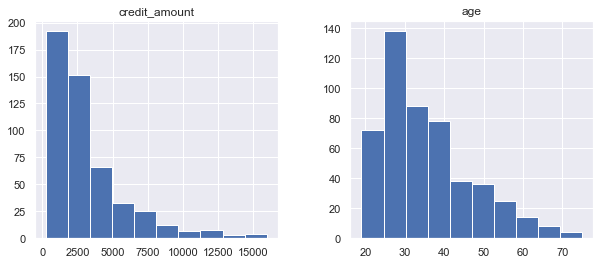

In [19]:
credit_df[['credit_amount','age']].hist(figsize=(10, 4))

<AxesSubplot:xlabel='employment', ylabel='count'>

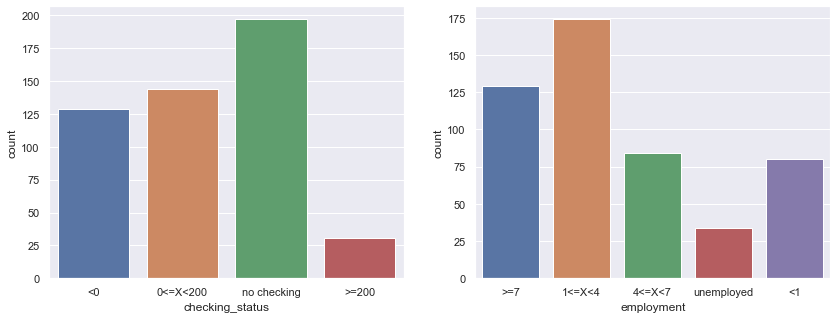

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='checking_status', data=credit_df, ax=axes[0])
sns.countplot(x='employment', data=credit_df, ax=axes[1])

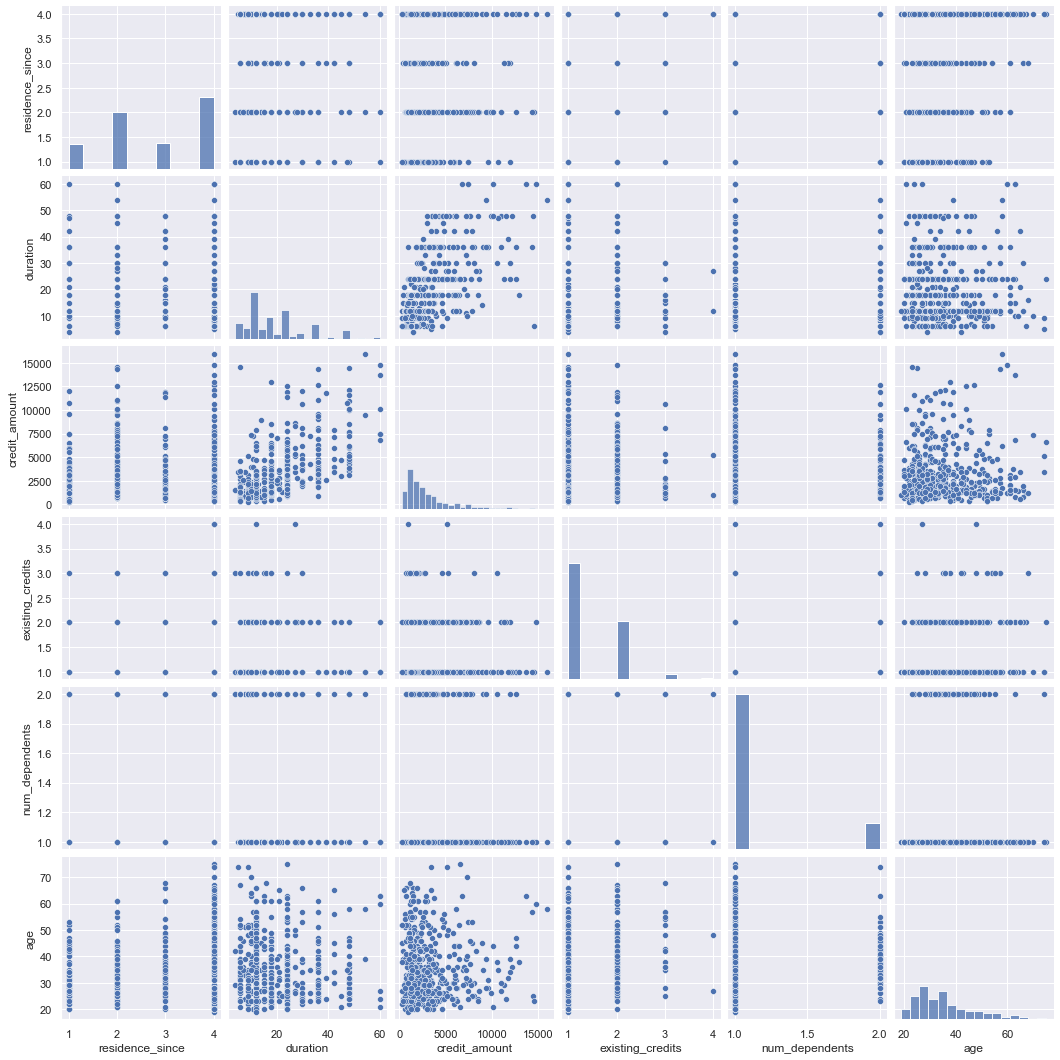

In [21]:
num_columns = list(set(credit_df.columns))
sns.pairplot(credit_df[num_columns])

In [22]:
corr_matrix = credit_df[num_columns].corr()
corr_matrix

,residence_since,duration,credit_amount,existing_credits,num_dependents,age
residence_since,1.000,0.055,0.036,0.069,0.083,0.325
duration,0.055,1.000,0.608,-0.031,-0.014,-0.032
credit_amount,0.036,0.608,1.000,0.017,0.022,0.025
existing_credits,0.069,-0.031,0.017,1.000,0.107,0.147
num_dependents,0.083,-0.014,0.022,0.107,1.000,0.112
age,0.325,-0.032,0.025,0.147,0.112,1.000


<AxesSubplot:>

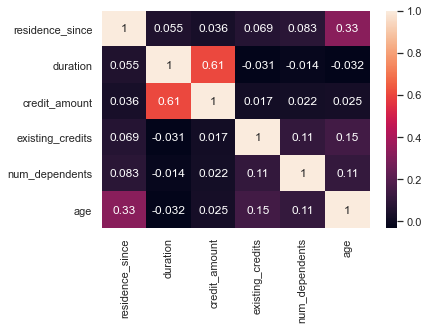

In [23]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

In [24]:
pd.crosstab(credit_df['personal_status'], credit_df['class'], margins=True)

class,bad,good,All
personal_status,,,
female div/dep/mar,50,103,153
male div/sep,11,14,25
male mar/wid,15,33,48
male single,61,214,275
All,137,364,501


<AxesSubplot:xlabel='Age_equal', ylabel='count'>

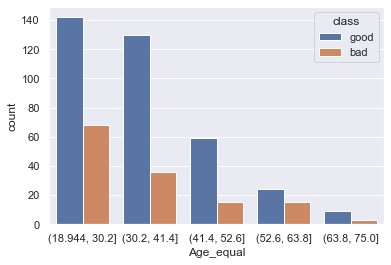

In [25]:
credit_df['Age_equal'] = pd.cut(credit_df['age'], 5)
sns.countplot(x='Age_equal', hue='class', data=credit_df)

## Пункт 9: Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

## Пункт 10: Какой признак(и) имеет смысл стандартизировать? Почему?

## Пункт 11: Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный. - зарплата, количество детей, хронические заболевания